In [32]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [34]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3a91bb66e4b29f47822c3bd361becd5


In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [37]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [40]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

talnakh ru
hobart au
fort saint john ca
lebu cl
marrakesh ma
cherskiy ru
rikitea pf
port hardy ca
valentin gomez farias mx
punta arenas cl
cabo san lucas mx
kaitangata nz
marfino ru
ushuaia ar
kununurra au
hamilton bm
kapaa us
coari br
amiens fr
cherskiy ru
atuona pf
umm lajj sa
zhigansk ru
illoqqortoormiut gl
winslow us
barentsburg sj
manacapuru br
arraial do cabo br
jamestown sh
barentsburg sj
kavieng pg
ostrovnoy ru
hermanus za
sinnamary gf
mar del plata ar
harper lr
port alfred za
waipawa nz
lorengau pg
tautira pf
victoria sc
kapaa us
baillif gp
riyadh sa
belushya guba ru
mataura pf
namibe ao
wakkanai jp
zarichne ua
barrow us
magione it
leh in
mataura pf
shelburne ca
cumberland us
qaanaaq gl
illoqqortoormiut gl
harper lr
hithadhoo mv
punta arenas cl
cottonwood us
hobart au
karaul ru
kapaa us
punta arenas cl
praia da vitoria pt
goundam ml
ushuaia ar
ushuaia ar
bengkulu id
bluff nz
cabo san lucas mx
carnarvon au
bur gabo so
karratha au
bredasdorp za
saint-philippe re
barentsburg sj
k

taolanaro mg
vaini to
derzhavinsk kz
mount gambier au
upernavik gl
qaanaaq gl
port alfred za
cidreira br
zarand ir
port elizabeth za
atuona pf
taolanaro mg
orlik ru
khatanga ru
mar del plata ar
iqaluit ca
port elizabeth za
nhulunbuy au
hilo us
mataura pf
romny ru
busselton au
albany au
taolanaro mg
amderma ru
attawapiskat ca
busselton au
auki sb
kalabo zm
hilo us
virginia beach us
busselton au
rikitea pf
nikolskoye ru
vaini to
tigre pa
tutoia br
victoria sc
faanui pf
santa catarina da serra pt
upernavik gl
ancud cl
lovozero ru
barentsburg sj
mataura pf
ratnagiri in
ixtapa mx
taolanaro mg
punta arenas cl
vaitupu wf
illoqqortoormiut gl
sigayevo ru
east london za
rikitea pf
new norfolk au
bredasdorp za
esperance au
hithadhoo mv
tsihombe mg
dukat ru
rikitea pf
port alfred za
esperance au
lenggries de
pechora ru
bluff nz
barrow us
atar mr
altonia br
lac du bonnet ca
lavrentiya ru
kapaa us
xining cn
port alfred za
ribeira grande pt
ishigaki jp
rocha uy
kyren ru
disna by
yar-sale ru
amderma r

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | valentin gomez farias
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | marfino
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | coari
Processing Record 19 of Set 1 | amiens
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | umm lajj
Processing Record 22 of Set 1 | zhigansk
Pro

Processing Record 34 of Set 4 | turukhansk
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | codrington
Processing Record 37 of Set 4 | tooele
Processing Record 38 of Set 4 | bakonyszentlaszlo
Processing Record 39 of Set 4 | ugoofaaru
Processing Record 40 of Set 4 | guajara-mirim
City not found. Skipping...
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | inta
Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | saint-augustin
Processing Record 46 of Set 4 | jertih
Processing Record 47 of Set 4 | dolni dobrouc
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | woodward
Processing Record 50 of Set 4 | fairbanks
Processing Record 1 of Set 5 | kuminskiy
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | drayton valley
Processing Record 4 of Set 5 | hihifo
City not found. Skipping...
Processing Record 5 of Set 5 | bambous virie

Processing Record 24 of Set 8 | olafsvik
Processing Record 25 of Set 8 | knysna
Processing Record 26 of Set 8 | salalah
Processing Record 27 of Set 8 | marsa matruh
Processing Record 28 of Set 8 | bozoum
Processing Record 29 of Set 8 | khash
Processing Record 30 of Set 8 | ploemeur
Processing Record 31 of Set 8 | xacmaz
Processing Record 32 of Set 8 | sangmelima
Processing Record 33 of Set 8 | atlantic beach
Processing Record 34 of Set 8 | arandis
Processing Record 35 of Set 8 | makat
Processing Record 36 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 8 | banda aceh
Processing Record 38 of Set 8 | te anau
Processing Record 39 of Set 8 | porto santo
Processing Record 40 of Set 8 | tenerife
Processing Record 41 of Set 8 | ukiah
Processing Record 42 of Set 8 | zarand
Processing Record 43 of Set 8 | orlik
Processing Record 44 of Set 8 | nhulunbuy
Processing Record 45 of Set 8 | romny
Processing Record 46 of Set 8 | kalabo
Processing Record 47 of Set 8 | vir

Processing Record 11 of Set 12 | mandalgovi
Processing Record 12 of Set 12 | julio de castilhos
Processing Record 13 of Set 12 | aksu
Processing Record 14 of Set 12 | saleaula
City not found. Skipping...
Processing Record 15 of Set 12 | los llanos de aridane
Processing Record 16 of Set 12 | aswan
Processing Record 17 of Set 12 | bastrop
Processing Record 18 of Set 12 | ozu
Processing Record 19 of Set 12 | aktash
Processing Record 20 of Set 12 | artyk
City not found. Skipping...
Processing Record 21 of Set 12 | yanan
City not found. Skipping...
Processing Record 22 of Set 12 | sfantu gheorghe
Processing Record 23 of Set 12 | yuzhou
Processing Record 24 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 25 of Set 12 | necochea
Processing Record 26 of Set 12 | emerald
Processing Record 27 of Set 12 | edson
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | kambove
Processing Record 30 of Set 12 | prince rupert
Processing Record 31 of Set 12 | kam

In [42]:
len(city_data)

557

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,33.08,78,7,6.91,RU,2021-09-23 22:33:41
1,Hobart,-42.8794,147.3294,49.86,71,20,7.00,AU,2021-09-23 22:29:13
2,Lebu,-37.6167,-73.6500,52.16,79,2,11.74,CL,2021-09-23 22:31:01
3,Marrakesh,31.6315,-8.0083,71.67,68,0,6.91,MA,2021-09-23 22:33:42
4,Cherskiy,68.7500,161.3000,32.40,80,75,7.34,RU,2021-09-23 22:33:42
5,Rikitea,-23.1203,-134.9692,74.14,76,96,22.95,PF,2021-09-23 22:33:43
6,Port Hardy,50.6996,-127.4199,55.58,71,75,8.05,CA,2021-09-23 22:33:43
7,Valentin Gomez Farias,28.2167,-106.5833,75.52,41,42,0.98,MX,2021-09-23 22:33:44
8,Punta Arenas,-53.1500,-70.9167,46.51,66,75,9.22,CL,2021-09-23 22:30:35
9,Cabo San Lucas,22.8909,-109.9124,94.51,70,40,13.80,MX,2021-09-23 22:31:02


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Talnakh,RU,2021-09-23 22:33:41,69.4865,88.3972,33.08,78,7,6.91
1,Hobart,AU,2021-09-23 22:29:13,-42.8794,147.3294,49.86,71,20,7.00
2,Lebu,CL,2021-09-23 22:31:01,-37.6167,-73.6500,52.16,79,2,11.74
3,Marrakesh,MA,2021-09-23 22:33:42,31.6315,-8.0083,71.67,68,0,6.91
4,Cherskiy,RU,2021-09-23 22:33:42,68.7500,161.3000,32.40,80,75,7.34
...,...,...,...,...,...,...,...,...,...
552,Southampton,GB,2021-09-23 22:33:46,50.9040,-1.4043,60.06,88,72,1.01
553,San Carlos De Bariloche,AR,2021-09-23 22:37:52,-41.1456,-71.3082,60.55,27,40,14.97
554,Pangnirtung,CA,2021-09-23 22:37:52,66.1451,-65.7125,33.80,69,75,11.50
555,Sijunjung,ID,2021-09-23 22:37:53,-0.6876,100.9537,71.92,98,81,0.56


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

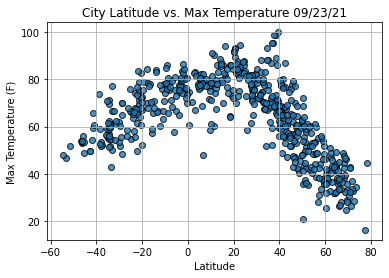

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

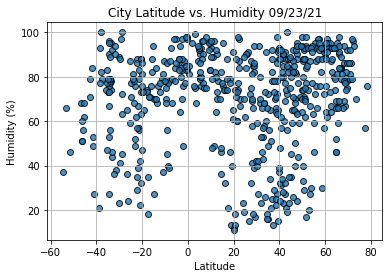

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

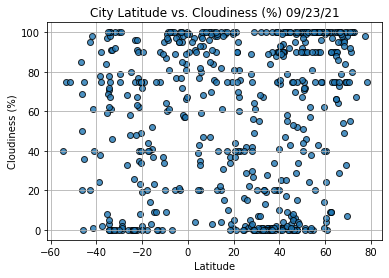

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

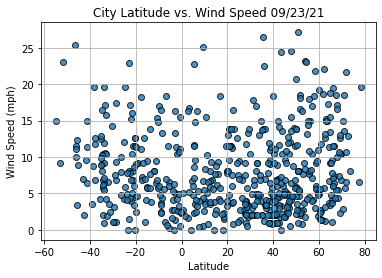

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

    city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

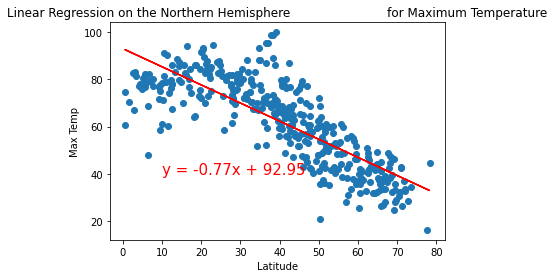

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

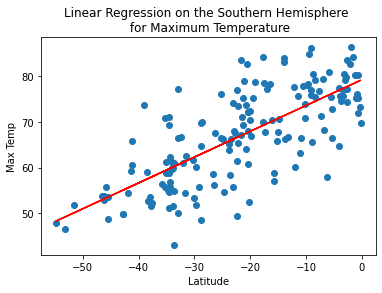

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

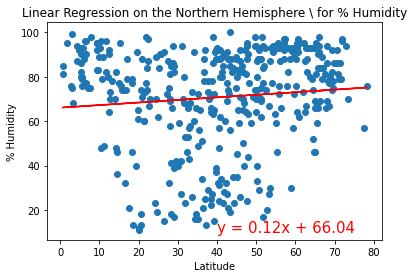

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

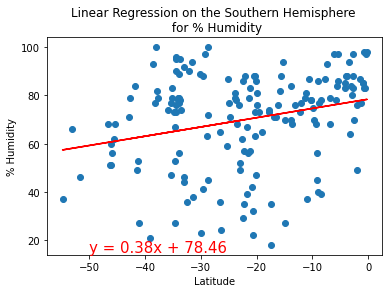

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

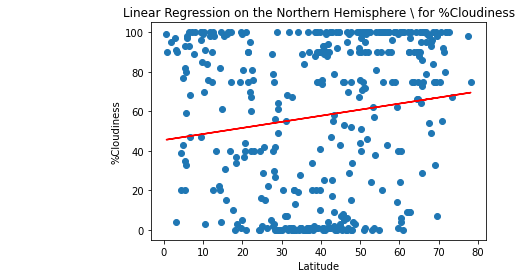

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for %Cloudiness', '%Cloudiness',(-40,10))

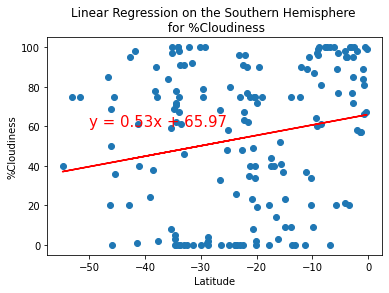

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for %Cloudiness', '%Cloudiness',(-50,60))

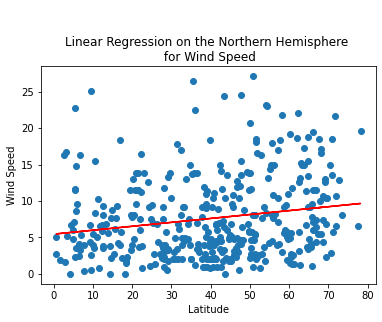

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

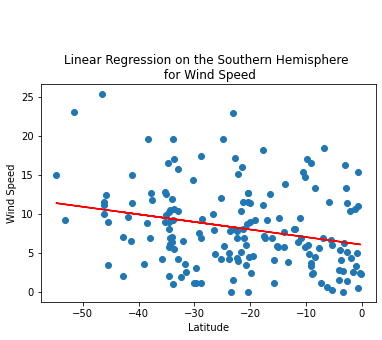

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))